In [5]:
import pandas as pd

# 파일 로드
data = pd.read_excel('C:/Users/SAMSUNG/Documents/vscode/2024/ML/프로젝트/data/oecdCLI_pre2.xlsx')
data = pd.DataFrame(data)
# 데이터 프레임의 처음 몇 줄을 확인
data.head()

,날짜,지수,전월차,prelabel,label
0,2013-01-01,99.20000,0.20000,0,0
1,2013-02-01,99.30000,0.10000,0,0
2,2013-03-01,99.45225,0.15225,0,0
3,2013-04-01,99.61071,0.15846,0,0
4,2013-05-01,99.73196,0.12125,0,0


In [6]:
data['prelabel'].value_counts()

prelabel
1    68
0    64
Name: count, dtype: int64

In [7]:
data['label'].value_counts()

label
0    73
1    59
Name: count, dtype: int64

In [8]:
# 'prelabel' 열에서 연속된 값의 개수를 계산하고, 해당 상태를 표시하는 함수 정의
def detect_economic_trends(encoding_series):
    # 결과를 저장할 리스트
    trends = []
    # 연속된 값을 세기 위한 카운터
    count = 1
    # 이전 값 저장 변수
    previous_value = encoding_series.iloc[0]

    for i in range(1, len(encoding_series)):
        # 현재 값
        current_value = encoding_series.iloc[i]
        # 이전 값과 현재 값이 같다면 카운터 증가
        if current_value == previous_value:
            count += 1
        else:
            # 6회 이상 연속되면 상태를 리스트에 추가
            if count >= 6:
                trend = "경기수축" if previous_value == 1 else "경기확장"
                trends.append((trend, count, i-count, i-1))
            # 카운터와 이전 값 리셋
            count = 1
            previous_value = current_value

    # 마지막으로 확인 (루프 끝난 후 마지막 값 체크)
    if count >= 6:
        trend = "경기수축" if previous_value == 1 else "경기확장"
        trends.append((trend, count, i+1-count, i))

    return trends

# 'prelabel' 열을 함수에 적용
economic_trends = detect_economic_trends(data['prelabel'])
economic_trends


[('경기확장', 6, 0, 5),
 ('경기확장', 10, 18, 27),
 ('경기수축', 9, 28, 36),
 ('경기확장', 15, 37, 51),
 ('경기수축', 29, 52, 80),
 ('경기확장', 20, 81, 100),
 ('경기수축', 21, 101, 121),
 ('경기확장', 10, 122, 131)]

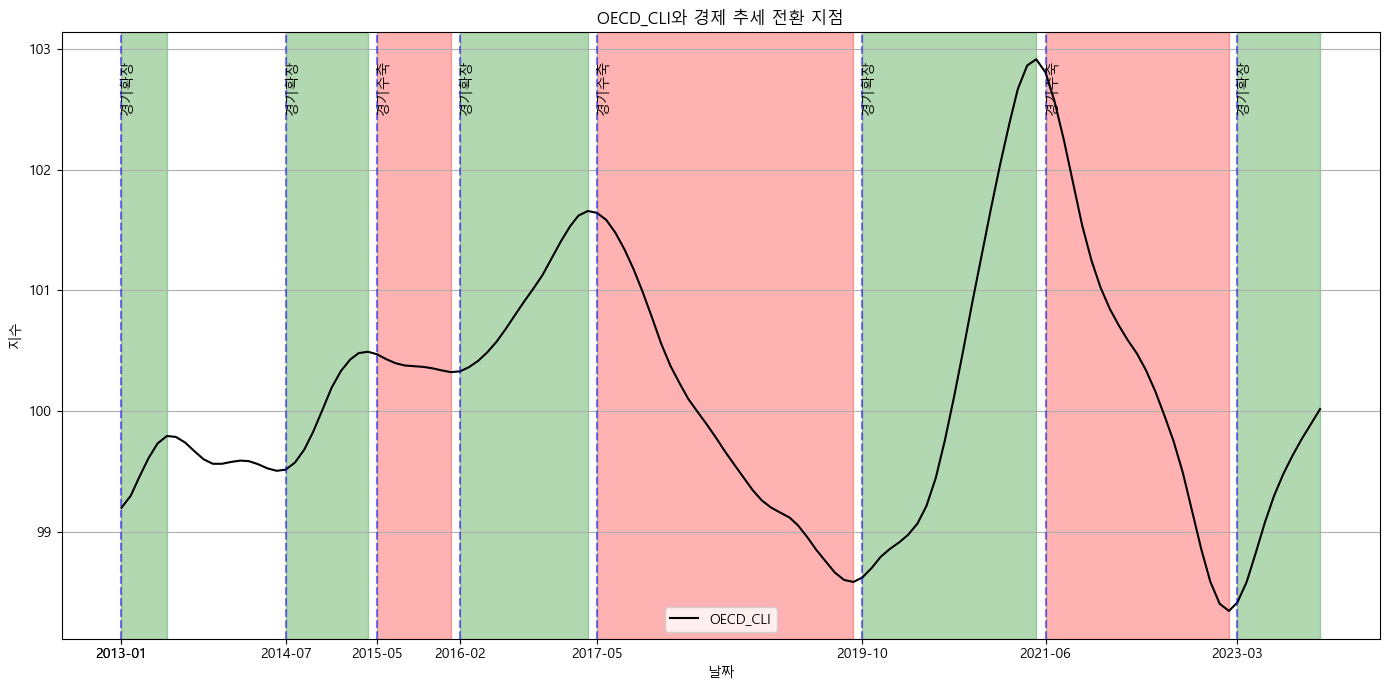

In [13]:
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 그래프 준비
plt.figure(figsize=(14, 7))
plt.plot(data['날짜'], data['지수'], label='OECD_CLI', color='black')

# 경제 추세에 따른 음영 추가 및 전환 지점 눈금 및 텍스트 추가
transition_points = [0]  # 시작점 추가
for trend, count, start_idx, end_idx in economic_trends:
    color = 'red' if trend == "경기수축" else 'green'
    plt.axvspan(data['날짜'][start_idx], data['날짜'][end_idx], color=color, alpha=0.3)
    transition_points.append(start_idx)
    plt.axvline(x=data['날짜'][start_idx], color='blue', linestyle='--', alpha=0.5)  # 전환 지점 표시
    plt.text(data['날짜'][start_idx], max(data['지수']), trend, rotation=90, verticalalignment='top')  # 전환 지점 텍스트

# x축 날짜 눈금을 월 단위로 설정
ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))

# x축 주요 지점의 눈금만 표시
ax.set_xticks(data['날짜'][transition_points])

# 범례와 타이틀 추가
plt.title('OECD_CLI와 경제 추세 전환 지점')
plt.xlabel('날짜')
plt.ylabel('지수')
plt.legend()
plt.grid(True)

# 그래프 표시
plt.tight_layout()
plt.show()


In [14]:
# 'prelabel' 열에서 연속된 값의 개수를 계산하고, 해당 상태를 표시하는 함수 정의
def detect_economic_trends(encoding_series2):
    # 결과를 저장할 리스트
    trends = []
    # 연속된 값을 세기 위한 카운터
    count = 1
    # 이전 값 저장 변수
    previous_value = encoding_series2.iloc[0]

    for i in range(1, len(encoding_series2)):
        # 현재 값
        current_value = encoding_series2.iloc[i]
        # 이전 값과 현재 값이 같다면 카운터 증가
        if current_value == previous_value:
            count += 1
        else:
            # 6회 이상 연속되면 상태를 리스트에 추가
            if count >= 6:
                trend = "경기수축" if previous_value == 1 else "경기확장"
                trends.append((trend, count, i-count, i-1))
            # 카운터와 이전 값 리셋
            count = 1
            previous_value = current_value

    # 마지막으로 확인 (루프 끝난 후 마지막 값 체크)
    if count >= 6:
        trend = "경기수축" if previous_value == 1 else "경기확장"
        trends.append((trend, count, i+1-count, i))

    return trends

# 'prelabel' 열을 함수에 적용
economic_trends2 = detect_economic_trends(data['label'])
economic_trends2

[('경기확장', 28, 0, 27),
 ('경기수축', 9, 28, 36),
 ('경기확장', 15, 37, 51),
 ('경기수축', 29, 52, 80),
 ('경기확장', 20, 81, 100),
 ('경기수축', 21, 101, 121),
 ('경기확장', 10, 122, 131)]

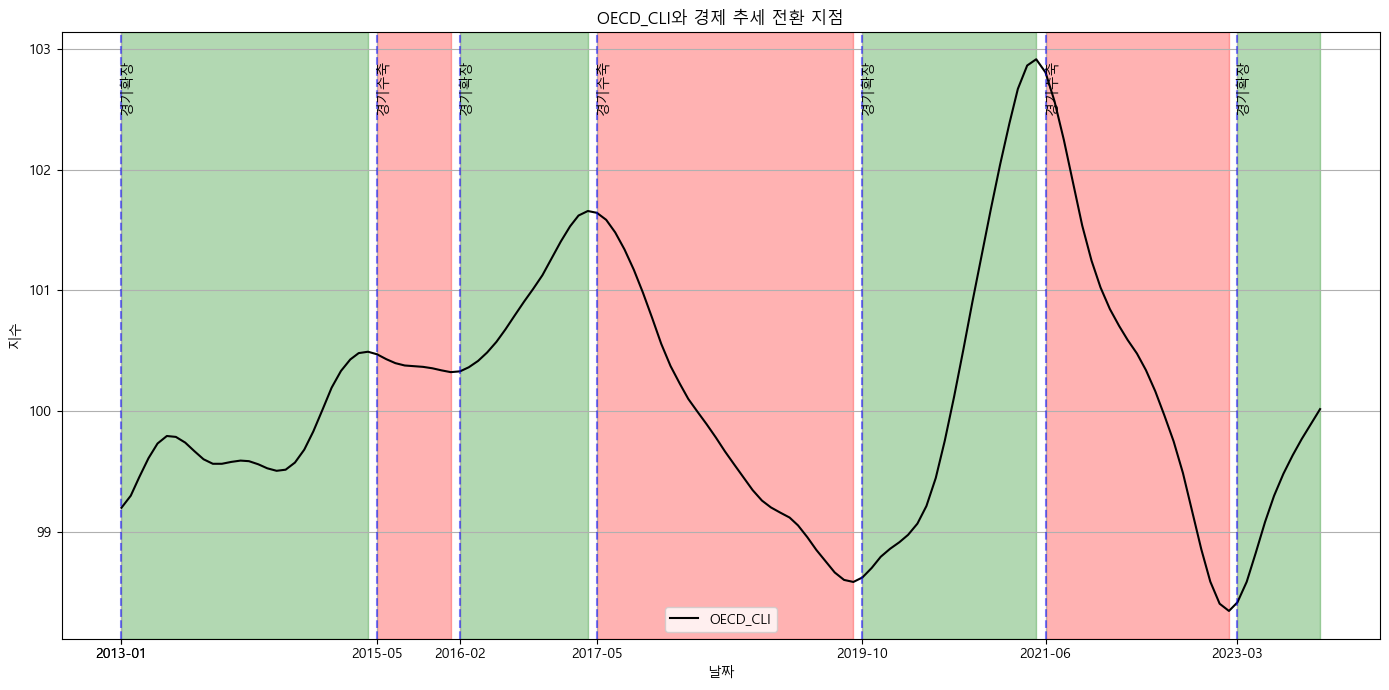

In [15]:
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 그래프 준비
plt.figure(figsize=(14, 7))
plt.plot(data['날짜'], data['지수'], label='OECD_CLI', color='black')

# 경제 추세에 따른 음영 추가 및 전환 지점 눈금 및 텍스트 추가
transition_points = [0]  # 시작점 추가
for trend, count, start_idx, end_idx in economic_trends2:
    color = 'red' if trend == "경기수축" else 'green'
    plt.axvspan(data['날짜'][start_idx], data['날짜'][end_idx], color=color, alpha=0.3)
    transition_points.append(start_idx)
    plt.axvline(x=data['날짜'][start_idx], color='blue', linestyle='--', alpha=0.5)  # 전환 지점 표시
    plt.text(data['날짜'][start_idx], max(data['지수']), trend, rotation=90, verticalalignment='top')  # 전환 지점 텍스트

# x축 날짜 눈금을 월 단위로 설정
ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))

# x축 주요 지점의 눈금만 표시
ax.set_xticks(data['날짜'][transition_points])

# 범례와 타이틀 추가
plt.title('OECD_CLI와 경제 추세 전환 지점')
plt.xlabel('날짜')
plt.ylabel('지수')
plt.legend()
plt.grid(True)

# 그래프 표시
plt.tight_layout()
plt.show()


In [2]:
import pandas as pd

# 파일 로드
data2 = pd.read_excel('C:/Users/SAMSUNG/Documents/vscode/2024/ML/프로젝트/data/통계청경기순환라벨링.xlsx')
data2 = pd.DataFrame(data2)
# 데이터 프레임의 처음 몇 줄을 확인
data2.head()

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_4256\3745005833.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,날짜,label
0,2013-01-01,0
1,2013-02-01,0
2,2013-03-01,0
3,2013-04-01,0
4,2013-05-01,0


In [3]:
data2['label'].value_counts()

label
0    88
1    32
Name: count, dtype: int64

In [18]:
import pandas as pd

# 파일 로드
data2 = pd.read_excel('C:/Users/SAMSUNG/Documents/vscode/2024/ML/프로젝트/data/통계청경기순환라벨링.xlsx', index_col=0)

# 'label' 열에서 국면을 분류하는 함수 정의
def classify_economic_phase(data2):
    # 결과를 저장할 리스트
    trends = []
    # 이전 값 저장 변수
    previous_value = None

    # 데이터의 시작과 끝 날짜
    start_date = data2.index[0]
    end_date = data2.index[-1]

    # 국면 변화 시작 날짜
    phase_start_date = None

    for date2, label in data2.iterrows():
        # 현재 값
        current_value = label['label']
        
        # 이전 값과 현재 값이 다르면 국면 변경
        if current_value != previous_value:
            # 이전 값이 있으면(최초는 제외)
            if previous_value is not None:
                # 국면 변화 시작 날짜부터 현재까지의 국면을 결정
                phase_end_date = date2 - pd.DateOffset(days=1)
                trends.append((previous_value, phase_start_date, phase_end_date))
            
            # 국면 변경 날짜 업데이트
            phase_start_date = date2
            previous_value = current_value
    
    # 마지막 국면 추가
    if phase_start_date is not None:
        trends.append((previous_value, phase_start_date, end_date))
    
    return trends

# 국면 분류 결과
economic_phases = classify_economic_phase(data2)

# 결과 출력
for phase, start_date, end_date in economic_phases:
    print(f"국면: {'경기확장' if phase == 0 else '경기수축'}, 시작 날짜: {start_date}, 종료 날짜: {end_date}")


국면: 경기수축, 시작 날짜: 2013-01-01 00:00:00, 종료 날짜: 2013-03-31 00:00:00
국면: 경기확장, 시작 날짜: 2013-04-01 00:00:00, 종료 날짜: 2017-08-31 00:00:00
국면: 경기수축, 시작 날짜: 2017-09-01 00:00:00, 종료 날짜: 2020-04-30 00:00:00
국면: 경기확장, 시작 날짜: 2020-05-01 00:00:00, 종료 날짜: 2022-12-01 00:00:00


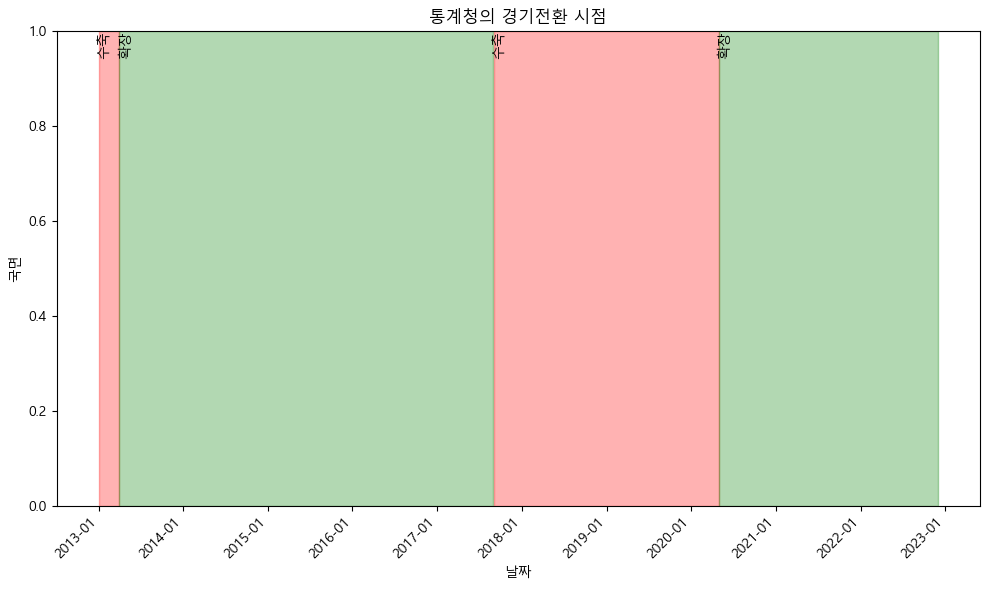

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 로드
data2 = pd.read_excel('C:/Users/SAMSUNG/Documents/vscode/2024/ML/프로젝트/data/통계청경기순환라벨링.xlsx', index_col=0)

# 'label' 열에서 국면을 분류하는 함수 정의
def classify_economic_phase(data2):
    # 결과를 저장할 리스트
    trends = []
    # 이전 값 저장 변수
    previous_value = None

    # 데이터의 시작과 끝 날짜
    start_date = data2.index[0]
    end_date = data2.index[-1]

    # 국면 변화 시작 날짜
    phase_start_date = None

    for date2, label in data2.iterrows():
        # 현재 값
        current_value = label['label']
        
        # 이전 값과 현재 값이 다르면 국면 변경
        if current_value != previous_value:
            # 이전 값이 있으면(최초는 제외)
            if previous_value is not None:
                # 국면 변화 시작 날짜부터 현재까지의 국면을 결정
                phase_end_date = date2 - pd.DateOffset(days=1)
                trends.append((previous_value, phase_start_date, phase_end_date))
            
            # 국면 변경 날짜 업데이트
            phase_start_date = date2
            previous_value = current_value
    
    # 마지막 국면 추가
    if phase_start_date is not None:
        trends.append((previous_value, phase_start_date, end_date))
    
    return trends

# 국면 분류 결과
economic_phases = classify_economic_phase(data2)

# 그래프 설정
plt.figure(figsize=(10, 6))

# 각 국면별 음영 시각화
for phase, start_date, end_date in economic_phases:
    color = 'green' if phase == 0 else 'red'  # 경기확장은 녹색, 경기수축은 빨강색
    plt.axvspan(start_date, end_date, color=color, alpha=0.3)
    plt.text(start_date, max(data2['label']), '확장' if phase == 0 else '수축', rotation=90, verticalalignment='top')  # 전환 지점 텍스트 추가

# x축 눈금을 'yyyy-mm' 형식으로 설정
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))


# 그래프 제목과 라벨 설정
plt.title('통계청의 경기전환 시점')
plt.xlabel('날짜')
plt.ylabel('국면')

# 그래프 표시
plt.tight_layout()
plt.show()
